# Structured Responses with Llama 3.1

This notebook helps you to understand and generate a structured response for Llama 3.1 models using [Fireworks AI](https://fireworks.ai) Structured Response Feature.

## Setup

Install all the dependencies and import the required python modules.

In [ ]:
pip install --upgrade fireworks-ai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00


## Setup your API Key

In order to use the Llama 3.1, you must first obtain Fireworks API Keys. If you don't already have one, create a [Fireworks AI](https://fireworks.ai) account. Under Account Settings, click on [API Keys](https://fireworks.ai/api-keys) to create one.

In [ ]:
from fireworks.client import Fireworks

#replace the FIREWORKS_API_KEY with the key copied in the above step.
client = Fireworks(api_key="FIREWORKS_API_KEY")

## Accessing Llama 3.1 Models using API

We are sending a request to Llama 3.1 405B model, alternatively you can change the model string to access the otherm models.

* accounts/fireworks/models/llama-v3p1-70b-instruct
* accounts/fireworks/models/llama-v3p1-8B-instruct

### Chat Completions API

In [ ]:
model_name = "accounts/fireworks/models/llama-v3p1-405b-instruct"

response = client.chat.completions.create(
	model=model_name,
	messages=[{
		"role": "user",
		"content": "Who are you?",
	}],
)
print(response.choices[0].message.content)

I'm an artificial intelligence model known as Llama. Llama stands for "Large Language Model Meta AI."


## Grammar Mode

Grammar mode enables you to specify a forced output schema for any Fireworks model via formal grammar called GBNF


Say you want the model to return a specific response, grammar mode helps the model to stay constrained.

**Note**

Your model can't see the Grammar you added in the request. You also have to add necessary details in the prompt for a qualitative response.

Ex:

Read more about [GBNF](https://github.com/ggerganov/llama.cpp/tree/master/grammars), how can you [use it](https://docs.fireworks.ai/structured-responses/structured-output-grammar-based)



In [ ]:
vehicle_grammar = """
root    ::= vehicle
vehicle ::= "sedan" | "suv" | "motorcycle" | "bicycle" | "truck"
"""

##

chat_completion = client.chat.completions.create(
    model="accounts/fireworks/models/llama-v3p1-405b-instruct",
    response_format={"type": "grammar", "grammar": vehicle_grammar},
    messages=[
        {
            "role": "system",
            "content": "Based on the description, identify the type of vehicle. Possible choices: sedan, suv, motorcycle, bicycle, truck. Answer with a single word.",
        },
        {
            "role": "user",
            "content": "Four wheeler high truck like vehicle",
        },
    ],
)
print(chat_completion.choices[0].message.content)


suv


Let us try a more complicated grammar.

Imagine you're building an application that needs to generate computer system specifications. You want the output to be consistent and easily parseable. This is where grammar-based responses shine.

In the below code snippet, `computer_system_grammar` specifies the structure and possible values for various components of a computer system. This grammar acts as a template for our output.

Notice the `response_format` field where we tell the model to use our defined grammar.

Ofcourse, the grammar should be comprehensive enough to cover all possible valid outputs.

In [ ]:
grammar = """
root ::= system-description

system-description ::= "Processor: " processor "Memory: " memory "Storage: " storage "GPU: " gpu "OS: " os

processor ::= cpu-type " " cores " cores @ " clock-speed "GHz\n"
cpu-type ::= ("Intel Core i" ("5" | "7" | "9") | "AMD Ryzen " ("5" | "7" | "9"))
cores ::= ("4" | "6" | "8" | "12" | "16")
clock-speed ::= ("2.5" | "3.0" | "3.5" | "4.0" | "4.5")

memory ::= ram-size "GB " ram-type "RAM \n"
ram-size ::= ("8" | "16" | "32" | "64" | "128")
ram-type ::= ("DDR4" | "DDR5")

storage ::= storage-type " " storage-capacity "TB\n"
storage-type ::= ("SSD" | "HDD" | "NVMe SSD")
storage-capacity ::= ("0.5" | "1" | "2" | "4" | "8")

gpu ::= gpu-brand " " gpu-model "\n"
gpu-brand ::= ("NVIDIA" | "AMD")
gpu-model ::= ("RTX " ("3060" | "3070" | "3080" | "3090") | "RX " ("6600" | "6700" | "6800" | "6900"))

os ::= operating-system "\n"
operating-system ::= ("Windows 11" | "macOS Monterey" | "Ubuntu 22.04" | "Fedora 36")
"""

chat_completion = client.chat.completions.create(
    model="accounts/fireworks/models/llama-v3p1-405b-instruct",
    response_format={"type": "grammar", "grammar": grammar},
    messages=[
        {
            "role": "system",
            "content": "You are a computer system configurator. Generate a detailed computer system specification like processor, memory, storage, and GPU based on the user's requirements.",
        },
        {
            "role": "user",
            "content": "I need a high-performance gaming PC with the latest Intel processor, lots of RAM, and a powerful NVIDIA GPU.",
        },
    ],
)

print(chat_completion.choices[0].message.content)

Processor: Intel Core i9 12 cores @ 3.5GHz
Memory: 128GB DDR5RAM 
Storage: NVMe SSD 4TB
GPU: NVIDIA RTX 3080
OS: Windows 11



In [ ]:
from IPython.display import display, Latex

math_equation_grammar = """
root ::= equation
equation ::= left-side "=" right-side
left-side ::= term (operator term)*
right-side ::= term (operator term)*
term ::= variable | number | function | "(" left-side ")"
variable ::= [a-zA-Z]
number ::= integer | decimal
integer ::= "-"? [1-9] [0-9]?
decimal ::= "-"? [0-9]+ "." [0-9]+
function ::= function-name "(" left-side ")"
function-name ::= "sin" | "cos" | "tan" | "log" | "ln" | "sqrt"
operator ::= "+" | "-" | "*" | "/" | "^"
"""


chat_completion = client.chat.completions.create(
    model="accounts/fireworks/models/llama-v3p1-405b-instruct",
    response_format={"type": "grammar", "grammar": math_equation_grammar},
    messages=[
        {
            "role": "system",
            "content": "You are a math equation generator. Create equations based on the given prompts.",
        },
        {
            "role": "user",
            "content": "Generate a quadratic equation with two variables for example like y=mx+c, avoid using * for multiplication",
        },
    ],
)


display(Latex(chat_completion.choices[0].message.content))

<IPython.core.display.Latex object>

Another type of grammar that can create something more creative.

In [ ]:
fantasy_creature_grammar = """
root ::= creature-description

creature-description ::= name "\n" habitat "\n" appearance "\n" abilities "\n" diet "\n" behavior "\n"

name ::= "Name: " (prefix " " suffix | made-up-name) "\n"
prefix ::= ("Aether" | "Frost" | "Shadow" | "Ember" | "Whisper")
suffix ::= ("wing" | "claw" | "fang" | "scale" | "horn")
made-up-name ::= ("Zor" | "Kael" | "Nyx" | "Lumi" | "Vex") ("ian" | "ox" | "ith" | "ara" | "oon")

habitat ::= "Habitat: " climate " " terrain "\n"
climate ::= ("Arctic" | "Tropical" | "Temperate" | "Arid" | "Subterranean")
terrain ::= ("mountains" | "forests" | "swamps" | "deserts" | "caverns")

appearance ::= "Appearance: " size " " body-type " with " feature1 " and " feature2 "\n"
size ::= ("Tiny" | "Small" | "Medium" | "Large" | "Colossal")
body-type ::= ("humanoid" | "quadruped" | "serpentine" | "avian" | "amorphous")
feature1 ::= color " " body-part
feature2 ::= texture " " appendage
color ::= ("iridescent" | "shadowy" | "luminescent" | "chromatic" | "translucent")
body-part ::= ("eyes" | "scales" | "fur" | "skin" | "carapace")
texture ::= ("crystalline" | "feathered" | "spiked" | "gelatinous" | "metallic")
appendage ::= ("tentacles" | "wings" | "antlers" | "fins" | "tendrils")

abilities ::= "Abilities: " magical-power " and " physical-skill "\n"
magical-power ::= ("elemental manipulation" | "telepathy" | "shapeshifting" | "illusion casting" | "dimensional phasing")
physical-skill ::= ("supersonic flight" | "camouflage" | "regeneration" | "venomous bite" | "sonic screech")

diet ::= "Diet: " food-source "\n"
food-source ::= ("carnivorous" | "herbivorous" | "omnivorous" | "energy-absorbing" | "emotion-feeding")

behavior ::= "Behavior: " temperament " and " social-structure "\n"
temperament ::= ("aggressive" | "docile" | "curious" | "elusive" | "protective")
social-structure ::= ("solitary" | "pack-oriented" | "hive-minded" | "symbiotic" | "hierarchical")
"""

chat_completion = client.chat.completions.create(
    model="accounts/fireworks/models/llama-v3p1-405b-instruct",
    response_format={"type": "grammar", "grammar": fantasy_creature_grammar},
    messages=[
        {
            "role": "system",
            "content": "You are a fantasy creature creator. Generate a detailed description of a unique fantasy creature",
        },
        {
            "role": "user",
            "content": "Create a mysterious creature that lives in an unusual environment.",
        },
    ],
)
print(chat_completion.choices[0].message.content)

Name: Aether wing

Habitat: Arid caverns

Appearance: Large avian with iridescent skin and crystalline wings

Abilities: dimensional phasing and sonic screech

Diet: energy-absorbing

Behavior: elusive and solitary




### Detour: Call Stable Diffusion 3 to create the mythical creature

You can create a interesting image out of the features mentioned in above creature.

**Note:** You need a Stability AI API Key as the SD3 API. You can get a free API key [here](https://).

In [ ]:
###@title Install requirements
from io import BytesIO
import IPython
import json
import os
from PIL import Image
import requests
import time
from google.colab import output

Sending REST request to https://api.stability.ai/v2beta/stable-image/generate/sd3...
Saved image generated_1391489595.jpeg


<IPython.core.display.Javascript object>

Result image:


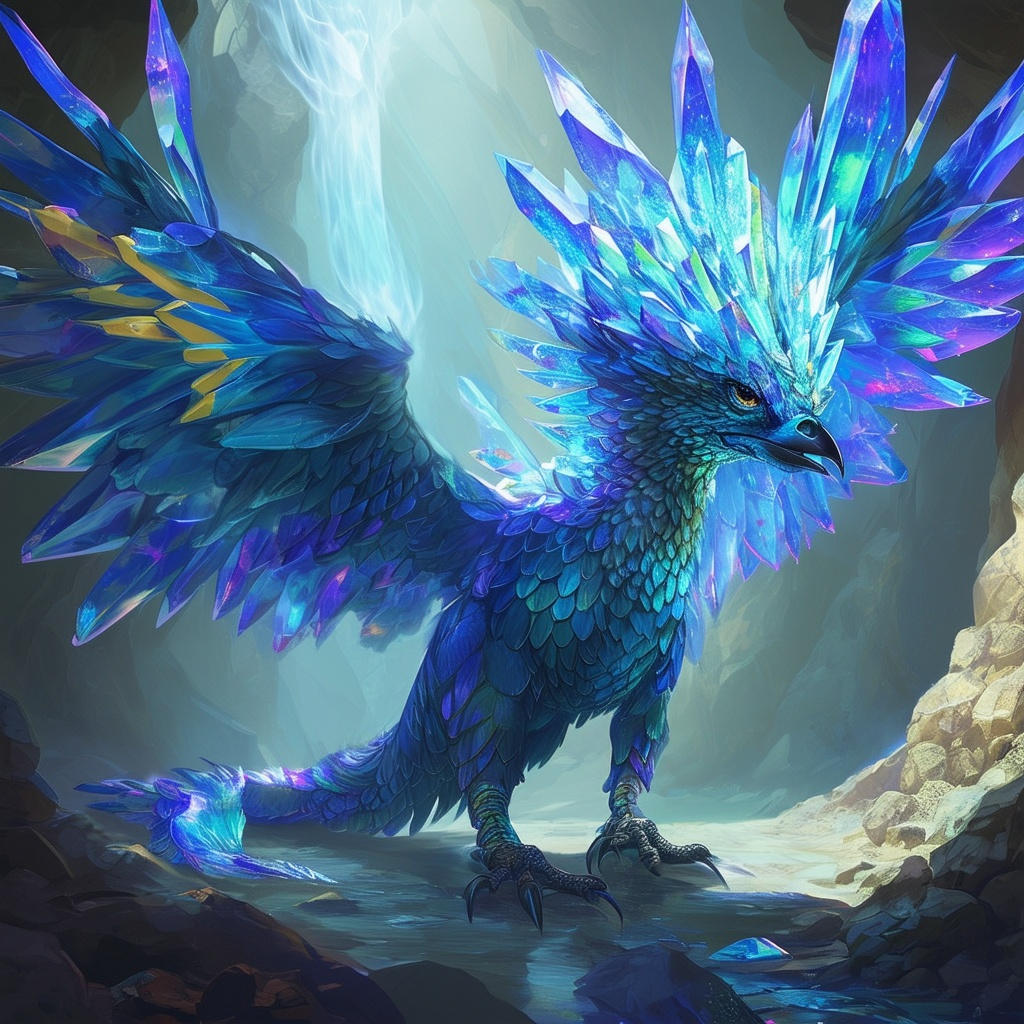

In [ ]:
#@title Send a request to SD3
def send_generation_request(
    host,
    params,
):
    headers = {
        "Accept": "image/*",
        "Authorization": f"Bearer <STABILITY_API_KEY>"
    }

    # Encode parameters
    files = {}
    image = params.pop("image", None)
    mask = params.pop("mask", None)
    if image is not None and image != '':
        files["image"] = open(image, 'rb')
    if mask is not None and mask != '':
        files["mask"] = open(mask, 'rb')
    if len(files)==0:
        files["none"] = ''

    # Send request
    print(f"Sending REST request to {host}...")
    response = requests.post(
        host,
        headers=headers,
        files=files,
        data=params
    )
    if not response.ok:
        raise Exception(f"HTTP {response.status_code}: {response.text}")

    return response


#@title SD3 Large

prompt = "Name: Lumiara  Habitat: Subterranean caverns  Appearance: Large avian with iridescent scales and crystalline wings  Abilities: illusion casting and sonic screech  Diet: omnivorous  Behavior: aggressive and solitary" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
aspect_ratio = "1:1" #@param ["21:9", "16:9", "3:2", "5:4", "1:1", "4:5", "2:3", "9:16", "9:21"]
seed = 0 #@param {type:"integer"}
output_format = "jpeg" #@param ["jpeg", "png"]

host = f"https://api.stability.ai/v2beta/stable-image/generate/sd3"

params = {
    "prompt" : prompt,
    "negative_prompt" : negative_prompt,
    "aspect_ratio" : aspect_ratio,
    "seed" : seed,
    "output_format" : output_format,
    "model" : "sd3-large",
    "mode" : "text-to-image"
}

response = send_generation_request(
    host,
    params
)

# Decode response
output_image = response.content
finish_reason = response.headers.get("finish-reason")
seed = response.headers.get("seed")

# Check for NSFW classification
if finish_reason == 'CONTENT_FILTERED':
    raise Warning("Generation failed NSFW classifier")

# Save and display result
generated = f"generated_{seed}.{output_format}"
with open(generated, "wb") as f:
    f.write(output_image)
print(f"Saved image {generated}")

output.no_vertical_scroll()
print("Result image:")
IPython.display.display(Image.open(generated))


One more example that shows how you can generate something creative and at the same point be bound the response to a specific options.


In [ ]:
futuristic_city_grammar = """
root ::= city-description

city-description ::= name "\n" location "\n" architecture "\n" infrastructure "\n" society "\n" economy "\n" unique-feature "\n"

name ::= "City Name: " (prefix "-" suffix | made-up-name) "\n"
prefix ::= ("Neo" | "Cyber" | "Quantum" | "Eco" | "Astro")
suffix ::= ("polis" | "topia" | "haven" | "nexus" | "sphere")
made-up-name ::= ("Zyn" | "Aeon" | "Flux" | "Novus" | "Helix") ("ia" | "on" | "ex" | "um" | "ar")

location ::= "Location: " terrain " in " region "\n"
terrain ::= ("floating islands" | "underwater domes" | "subterranean caverns" | "orbital platforms" | "desert oasis")
region ::= ("the Arctic" | "the Sahara" | "the Pacific Ocean" | "the Himalayas" | "low Earth orbit")

architecture ::= "Architecture: " building-material " structures with " design-feature " and " tech-integration "\n"
building-material ::= ("nanocarbon" | "bioplastic" | "self-repairing concrete" | "holographic" | "shape-shifting alloy")
design-feature ::= ("vertical gardens" | "gravity-defying spires" | "fractal geometries" | "bioluminescent facades" | "adaptive morphology")
tech-integration ::= ("AI-optimized layouts" | "quantum computing cores" | "neural network interfaces" | "zero-point energy taps" | "atmospheric purification systems")

infrastructure ::= "Infrastructure: " transportation " and " energy-source "\n"
transportation ::= ("teleportation grid" | "antigravity vehicles" | "hyperloop network" | "personal flight suits" | "thought-controlled drones")
energy-source ::= ("fusion reactors" | "zero-point energy harvesters" | "atmospheric electricity collectors" | "artificial photosynthesis" | "tidal power arrays")

society ::= "Society: " governance " with " social-structure "\n"
governance ::= ("AI-assisted direct democracy" | "technocratic council" | "decentralized blockchain consensus" | "hive-mind collective" | "augmented reality referendum system")
social-structure ::= ("post-scarcity communalism" | "meritocratic tiers" | "virtual reality-based clans" | "bio-engineered caste system" | "fluid identity collectives")

economy ::= "Economy: " primary-sector " and " currency-system "\n"
primary-sector ::= ("asteroid mining" | "consciousness data trading" | "synthetic biology engineering" | "quantum computing services" | "antimatter production")
currency-system ::= ("energy credits" | "computation time tokens" | "genetic patent shares" | "data-backed cryptocurrency")

unique-feature ::= "Unique Feature: " feature-description "\n"
feature-description ::= ("time dilation zones" | "sentient architecture" | "weather control matrix" | "dimensional transit hub" | "collective dream network")
"""

chat_completion = client.chat.completions.create(
    model="accounts/fireworks/models/llama-v3p1-405b-instruct",
    response_format={"type": "grammar", "grammar": futuristic_city_grammar},
    messages=[
        {
            "role": "system",
            "content": "You are a futuristic city designer. Generate a detailed description of a unique futuristic city that emulates great location and weather. Posseses great architecture and infrastructure.",
        },
        {
            "role": "user",
            "content": "Create an advanced city with cutting-edge technology and unusual societal structures.",
        },
    ],
)
print(chat_completion.choices[0].message.content)

City Name: Eco-haven

Location: floating islands in the Pacific Ocean

Architecture: bioplastic structures with adaptive morphology and AI-optimized layouts

Infrastructure: personal flight suits and zero-point energy harvesters

Society: AI-assisted direct democracy with virtual reality-based clans

Economy: asteroid mining and genetic patent shares

Unique Feature: weather control matrix




## JSON Mode

JSON mode is a feature that allows you to specify a JSON schema to force a language model to respond in a structured JSON format. This has several benefits:

* Clarity and precision in responses
* Easy parsing and processing of output
* Improved integration with other systems and applications
* Standardized format for consistent data handling

By using JSON mode, developers can ensure more predictable and easily manageable outputs from AI models, making it easier to incorporate AI capabilities into existing workflows and applications.

In [ ]:
pip install pydantic

In [ ]:
from pydantic import BaseModel, Field

In [ ]:
class ElectionResult(BaseModel):
    winner: str
    runner_up: str
    electoral_votes_winner: int
    electoral_votes_runner_up: int
    popular_vote_winner: int
    popular_vote_runner_up: int
    key_swing_states: list[str] = Field(max_items=5)
    major_campaign_issues: list[str] = Field(max_items=3)
    voter_turnout_percentage: float


In [ ]:
chat_completion = client.chat.completions.create(
    model="accounts/fireworks/models/llama-v3p1-405b-instruct",
    response_format={"type": "json_object", "schema": ElectionResult.model_json_schema()},
    messages=[
        {
            "role": "user",
            "content": "Provide detailed information about the 2008 US presidential election, including the winner, runner-up, electoral and popular vote counts, key swing states, major campaign issues, and voter turnout. Reply in a single JSON object.",
        },
    ],
)
print(chat_completion.choices[0].message.content)

{
"winner": "Barack Obama",
"runner_up": "John McCain",
"electoral_votes_winner": 365,
"electoral_votes_runner_up": 173,
"popular_vote_winner": 69485981,
"popular_vote_runner_up": 60488516,
"key_swing_states": ["Ohio", "Florida", "Virginia", "Colorado", "Nevada"],
"major_campaign_issues": ["Economy", "Healthcare", "Iraq War", "Financial Crisis"],
"voter_turnout_percentage": 57.1
}


Let us try something more complicated with JSON response.

Below code snippet is about an application that helps a Go to market team analyze incoming Customer Feedback.

The schema includes nested structures for sentiment analysis, topic analysis, and overall feedback metrics.

The CustomerFeedbackAnalysis class encapsulates the entire structure, ensuring that the LLM's output adheres to specific constraints, such as sentiment scores between 0 and 1, and limits on the number of topics and common words.

In [ ]:
from pydantic import BaseModel, Field
from typing import List

class SentimentAnalysis(BaseModel):
    positive: float = Field(ge=0, le=1)
    negative: float = Field(ge=0, le=1)
    neutral: float = Field(ge=0, le=1)

class TopicAnalysis(BaseModel):
    topic: str
    frequency: int
    sentiment: SentimentAnalysis

class CustomerFeedbackAnalysis(BaseModel):
    overall_sentiment: SentimentAnalysis
    top_topics: List[TopicAnalysis] = Field(min_items=3, max_items=5)
    total_reviews_analyzed: int
    average_rating: float = Field(ge=1, le=5)
    most_common_words: List[str] = Field(min_items=5, max_items=10)
    improvement_areas: List[str] = Field(min_items=2, max_items=4)

chat_completion = client.chat.completions.create(
    model="accounts/fireworks/models/llama-v3p1-405b-instruct",
    response_format={"type": "json_object", "schema": CustomerFeedbackAnalysis.model_json_schema()},
    messages=[
        {
            "role": "system",
            "content": "You are an AI-powered customer feedback analyzer. Analyze the given customer feedback data and provide insights in the specified JSON format."
        },
        {
            "role": "user",
            "content": """
            Analyze the following customer feedback data for our new smartphone model XYZ:

            1. "Great camera, but battery life is disappointing."
            2. "The phone is fast and responsive, love it!"
            3. "Screen quality is amazing, but it's a bit pric-ey."
            4. "Decent phone overall, nothing extraordinary."
            5. "The new AI features are impressive, but there's a learning curve."
            6. "Battery drains too quickly, especially when using 5G."
            7. "Best smartphone I've ever had, worth every penny!"
            8. "Good phone, but the lack of headphone jack is annoying."
            9. "Camera quality in low light could be better."
            10. "Very satisfied with the performance and desgn."

            Provide a comprehensive analysis of this feedback in a JSON Structure: Sentiment (positive, negative, neutral), Top level topics, reviews analyzed, most common words, improvement areas.
            """
        }
    ]
)

print(chat_completion.choices[0].message.content)

{
"overall_sentiment": {
"positive": 6,
"negative": 3,
"neutral": 1
},
"top_topics": [
{
"topic": "camera",
"frequency": 3,
"sentiment": {
"positive": 1,
"negative": 2
,
"neutral": 0
}
},
{
"topic": "battery",
"frequency": 3,
"sentiment": {
"positive": 0,
"negative": 3,
"neutral": 0
}
},
{
"topic": "performance",
"frequency": 4,
"sentiment": {
"positive": 4,
"negative": 0,
"neutral": 0
}
},
{
"topic": "price",
"frequency": 2,
"sentiment": {
"positive": 0,
"negative": 1,
"neutral": 1
}
},
{
"topic": "design",
"frequency": 1,
"sentiment": {
"positive": 1,
"negative": 0,
"neutral": 0
}
},
{
"topic": "AI features",
"frequency": 1,
"sentiment": {
"positive": 1,
"negative": 0,
"neutral": 0
}
},
{
"topic": "headphone jack",
"frequency": 1,
"sentiment": {
"positive": 0,
"negative": 1,
"neutral": 0
}
}
],
"total_reviews_analyzed": 10,
"average_rating": 3.8,
"most_common_words": [
"phone",
"camera",
"battery",
"performance",
"price"
],
"improvement_areas": [
"battery life",
"camera quality in lo

Similarly another example of a JSON mode, where we are trying to construct a JSON response of a patient health record system.

Here, `PatientHealthRecord` class serves as the top-level model, incorporating all these elements into a cohesive structure.

In [ ]:
from pydantic import BaseModel, Field
from typing import List, Optional
from datetime import date

class Medication(BaseModel):
    name: str
    dosage: str
    frequency: str
    start_date: date
    end_date: Optional[date] = None

class VitalSigns(BaseModel):
    blood_pressure: str
    heart_rate: int = Field(ge=40, le=200)
    respiratory_rate: int = Field(ge=8, le=40)
    temperature: float = Field(ge=35.0, le=42.0)
    oxygen_saturation: int = Field(ge=70, le=100)

class LabResult(BaseModel):
    test_name: str
    result: str
    unit: str
    reference_range: str
    is_abnormal: bool

class MedicalCondition(BaseModel):
    name: str
    diagnosis_date: date
    status: str = Field(pattern="^(Active|Resolved|Managed)$")

class PatientHealthRecord(BaseModel):
    patient_id: str
    name: str
    date_of_birth: date
    gender: str = Field(pattern="^(Male|Female|Other)$")
    height: float  # in cm
    weight: float  # in kg
    bmi: float = Field(ge=10.0, le=50.0)
    blood_type: str = Field(pattern="^(A|B|AB|O)[+-]$")
    allergies: List[str]
    current_medications: List[Medication]
    medical_conditions: List[MedicalCondition]
    recent_vital_signs: VitalSigns
    recent_lab_results: List[LabResult] = Field(max_items=5)
    last_physical_exam_date: date
    upcoming_appointments: List[date] = Field(max_items=3)

chat_completion = client.chat.completions.create(
    model="accounts/fireworks/models/llama-v3p1-405b-instruct",
    response_format={"type": "json_object", "schema": PatientHealthRecord.model_json_schema()},
    messages=[
        {
            "role": "system",
            "content": "You are an AI-powered electronic health record system. Generate a comprehensive patient health record based on the given information."
        },
        {
            "role": "user",
            "content": """
            Generate a detailed health record for a patient with the following characteristics:
            - Middle-aged adult with type 2 diabetes
            - Recently diagnosed with hypertension
            - Has a history of asthma
            - Currently taking medications for diabetes and hypertension
            - Had a physical exam and lab tests done recently
            - Has upcoming follow-up appointments

            Provide a comprehensive health record for the patient in a JSON schema with patient_id, name, date of birth, gender, height, weight, bmi, blood_type, allergies, current_medications, medical_conditions, recent_vital_signs, recent_lab_results, last_physical_exam_date, upcoming_appointments. Include realistic values for all fields.
            """
        }
    ]
)

print(chat_completion.choices[0].message.content)

{
"patient_id": "123456",
"name": "John Doe",
"date_of_birth": "1970-02-12",
"gender": "Male",
"height": 175,
"weight": 85,
"bmi": 27.8,
"blood_type": "O+",
"allergies": ["Peanuts", "Shellfish"],
"current_medications": [
{
"name": "Metformin",
"dosage": "500mg",
"frequency": "Twice a day"
,
"start_date": "2022-01-01"
},
{
"name": "Lisinopril",
"dosage": "10mg",
"frequency": "Once a day"
,
"start_date": "2022-02-01"
}
],
"medical_conditions": [
{
"name": "Type 2 Diabetes",
"diagnosis_date": "2018-05-01",
"status": "Active"
},
{
"name": "Hypertension",
"diagnosis_date": "2022-02-01",
"status": "Active"
},
{
"name": "Asthma",
"diagnosis_date": "1990-01-01",
"status": "Inactive"
}
],
"recent_vital_signs": {
"blood_pressure": "140/90",
"heart_rate": 80,
"respiratory_rate": 16,
"temperature": 36.5,
"oxygen_saturation": 98
},
"recent_lab_results": [
{
"test_name": "Hemoglobin A1c",
"result": "After 8.5%",
"unit": "%",
"reference_range": "4-7%",
"is_abnormal": true
},
{
"test_name": "Blood Glu

## Conclusion

The latest and greatest of open-source AI is here. We’re excited to see how the community leverages structured response Llama 3.1 API to create interesting applications.

To get started with Llama 3.1 and pricing, visit [docs.fireworks.ai](https://docs.fireworks.ai), [pricing](https://fireworks.ai/pricing).  If you have more questions, join our [discord community](https://discord.gg/fireworks-ai)